In [43]:
%matplotlib inline

from fastai.collab import *
from fastai.tabular import *

## Collaborative filtering example

In [3]:
user,item,title = 'userId','movieId','title'

Untar the data at url `URLs.ML_SAMPLE`.

In [4]:
path = untar_data(URLs.ML_SAMPLE)

Read the csv at `path/'ratings.csv'` to variable `ratings`, and show the first few rows.

In [5]:
ratings = pd.read_csv(path/'ratings.csv')

Create a `CollabDataBunch` from the df, using the ratings dataframe and a random seed of 42.

In [6]:
data = CollabDataBunch.from_df(ratings, seed=42)

Set a variable `y_range` as a 2-element array of [0, 5.5].

In [7]:
y_range = [0, 5.5]

Create a `collab_learner` from the data bunch, with 50 factors and the y_range created above.

In [8]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

Fit this learner for a cycle (lr = 5e-3).

In [9]:
learn.fit_one_cycle(1, 5e-3)

epoch,train_loss,valid_loss,time
0,1.479564,1.292616,00:01


## Movielens 100k

Create a new variable `path` set to the result of `Config.data_path()/'ml-100k'`.

In [27]:
# ! wget http://files.grouplens.org/datasets/movielens/ml-100k.zip -P {Config.data_path()} && unzip {Config.data_path()}/'ml-100k.zip' -d {Config.data_path()}
path = Config.data_path()/'ml-100k'

In [22]:
(Config.data_path()/'ml-100k').exists()

True

Create another ratings dataframe, but this time:
- the path should be `path/'u.data'`
- the delimiter should be `\t`
- there should be no header
- the column names should be `userId`, `movieId`, `rating`, and `timestamp`
    
Why do you need these extra specifications, as compared to the original dataframe?

We need the extra options to get the dataframe into the format we want.

In [28]:
path.ls()

[PosixPath('/home/paperspace/.fastai/data/ml-100k/u.genre'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/ua.base'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/u4.base'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/u.item'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/u5.test'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/u1.base'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/ua.test'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/README'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/u4.test'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/allbut.pl'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/ub.test'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/u.info'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/u.occupation'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/u5.base'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/u.user'),
 PosixPath('/home/paperspace/.fastai/data/ml-100k/mku.sh'),
 PosixPath('/home/pape

In [29]:
(path/'u.data').exists()

True

In [30]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None, names=['userId', 'movieId', 'rating', 'timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Create a movies CSV, with:
- path = `path/'u.item'`
- delimiter='|'
- encoding='latin-1'
- no header
- names = ['movieId', 'title', 'date', 'N', 'url', 'g0'-'g18']

Show the first few rows of this dataframe.

In [31]:
movies = pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1', header=None, names=['movieId', 'title', 'date', 'N', 'url', *['g%d' % i for i in range(19)]])

In [32]:
path/'u.item'

PosixPath('/home/paperspace/.fastai/data/ml-100k/u.item')

In [33]:
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Take a look at the length of the ratings dataframe.

In [34]:
ratings.shape[0]

100000

Merge the ratings and the movie dataframes into one big one that has columns:
- userId
- movieId
- rating
- timestamp
- title

Print out the head of this dataframe.

In [35]:
path

PosixPath('/home/paperspace/.fastai/data/ml-100k')

In [36]:
full = ratings.merge(movies, on='movieId').loc[:, ['userId', 'movieId', 'rating', 'timestamp', 'title']]
full.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


Create a `CollabDataBunch` from this dataframe, with random seed 42, valid_pct 0.1, item_name 'movieId'.

In [129]:
cdb = CollabDataBunch.from_df(full, seed=42, valid_pct=0.1, item_name='title')

Show a batch from this dataframe.

In [130]:
cdb.show_batch()

userId,title,target
151,Conspiracy Theory (1997),3.0
320,Army of Darkness (1993),5.0
758,Home for the Holidays (1995),2.0
458,"English Patient, The (1996)",4.0
561,Tin Cup (1996),1.0


Set `y_range` to [0, 5.5] once again.

In [131]:
y_range = [0, 5.5]

Create a collab_learner from the data bunch above, with 40 factors, using the y_range from above, with weight decay 1e-1.

In [132]:
learn = collab_learner(cdb, n_factors=40, y_range=y_range, wd=1e-1)

Find an appropriate learning rate.

In [133]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


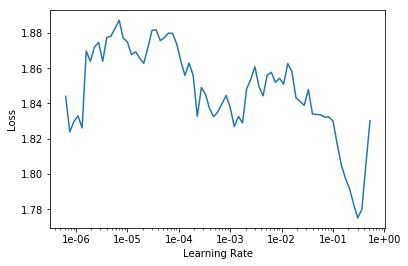

In [134]:
learn.recorder.plot(skip_end=15)

If everything is correct so far, your learning rate should be somewhere around 5e-3.

Fit a 5-epoch cycle with your learning rate.

In [135]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.921039,0.946324,00:09
1,0.872470,0.892294,00:09
2,0.772686,0.834110,00:09
3,0.654336,0.811339,00:09
4,0.558716,0.810298,00:08


The best losses should be in the low 0.8's. 

Save the model under the name `dotprod`.

In [136]:
learn.save('dotprod')

## Interpretation

### Setup

Load the `dotprod` model from above.

In [137]:
learn.load('dotprod')

CollabLearner(data=TabularDataBunch;

Train: LabelList (90000 items)
x: CollabList
userId 196; title Kolya (1996); ,userId 63; title Kolya (1996); ,userId 226; title Kolya (1996); ,userId 154; title Kolya (1996); ,userId 306; title Kolya (1996); 
y: FloatList
3.0,3.0,5.0,3.0,5.0
Path: .;

Valid: LabelList (10000 items)
x: CollabList
userId 498; title Casino (1995); ,userId 642; title Pocahontas (1995); ,userId 58; title 2001: A Space Odyssey (1968); ,userId 495; title Cat People (1982); ,userId 618; title Philadelphia (1993); 
y: FloatList
3.0,5.0,4.0,3.0,3.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.1, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<clas

Group the `rating_movie` dataset by title, and get a count of the `rating` field. Sort the values descending, and return the titles of the top 1000 rated movies.

In [148]:
full.groupby('title').count().sort_values('rating', ascending=False).index.values[:1000]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', ..., 'Dark City (1998)',
       'Waiting to Exhale (1995)', 'Jaws 3-D (1983)', 'Gang Related (1997)'], dtype=object)

### Movie bias

Get the biases for the top movies using `learn.bias`. Hint: what should `is_item` be if we want movie biases?  What does the `item` variable tell us from the beginning of this notebook?

`is_item` tells our collaborative filtering model how to distinguish between the fields representing the "items" in our data set, i.e. the things being rated, and the users rating them.

In [143]:
top_rated = full.groupby('title').count().sort_values('rating', ascending=False).index.values[:1000]
# .index.sort_values(ascending=False)[:1000]

In [144]:
top_rated[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

In [176]:
movie_bias = learn.bias(top_rated, is_item=True)

Get the average movie rating by title. Then put together a list of 3-tuples, each with the bias of the movie, the title of the movie, and the mean rating of the movie, for each of the top movies. Call this `movie_ratings`.

In [170]:
avg_rating = full.groupby('title').mean()['rating']

In [171]:
avg_rating.head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [177]:
movie_ratings = [(bias, title, avg_rating.loc[title]) for bias, title in zip(movie_bias, top_rated)]

In [178]:
movie_ratings

[(tensor(0.5282), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.3934), 'Contact (1997)', 3.8035363457760316),
 (tensor(0.4047), 'Fargo (1996)', 4.155511811023622),
 (tensor(0.3749), 'Return of the Jedi (1983)', 4.007889546351085),
 (tensor(0.1222), 'Liar Liar (1997)', 3.156701030927835),
 (tensor(0.1423), 'English Patient, The (1996)', 3.656964656964657),
 (tensor(0.2030), 'Scream (1996)', 3.4414225941422596),
 (tensor(0.3108), 'Toy Story (1995)', 3.8783185840707963),
 (tensor(0.3075), 'Air Force One (1997)', 3.6310904872389793),
 (tensor(0.1647), 'Independence Day (ID4) (1996)', 3.438228438228438),
 (tensor(0.4401), 'Raiders of the Lost Ark (1981)', 4.252380952380952),
 (tensor(0.4529), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.3246), 'Pulp Fiction (1994)', 4.060913705583756),
 (tensor(0.3177), 'Twelve Monkeys (1995)', 3.798469387755102),
 (tensor(0.5374), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.2166), 'Jerry Maguire (1996)', 3.7109375),
 

Create a function `item0` that grabs o[0] for some item o.

In [179]:
item0 = lambda x: x[0]

Sort the movie ratings by this function and print out the top 15 to get the worst movies.

In [180]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3834),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3135),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2924), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2696), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2516), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2359), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2264), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2222), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2155), 'Beverly Hills Ninja (1997)', 2.3125),
 (tensor(-0.2121), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2117), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2116), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2098), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2094), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.1966), 'Speed

Sort the movie ratings by the reverse of this function to get the best movies.

In [182]:
sorted(movie_ratings, key=item0, reverse=True)[:15]

[(tensor(0.6128), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5967), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5622), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5461), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5374), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5362), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.5304), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5282), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5058), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4963), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4909), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4872), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4798), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4725), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4601), "One Flew Over the Cuckoo's Nest (1975)", 4.291666666666667)]

### Movie weights

Get the movie weights using `learn.weight`. Call this `movie_w`. Print out the shape.

In [187]:
movie_w = learn.weight(top_rated)

In [188]:
movie_w.shape

torch.Size([1000, 40])

Get the first three principal components of `movie_w`. Call this `movie_pca`. Print out the shape.

In [191]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

Set the first three factors of `movie_pca` to variables `fac0`, `fac1`, `fac2`. Create a list of 2-tuples of the factor value and the title. Call this `movie_comp`.

In [194]:
fac0, fac1, fac2 = movie_pca[:,0], movie_pca[:,1], movie_pca[:,2]

In [197]:
fac0

tensor([-8.2130e-01, -8.4633e-02, -7.8981e-01, -2.0114e-01,  6.4854e-01,
        -4.5604e-01,  3.1700e-01, -1.8601e-01,  4.4011e-01,  4.9682e-01,
        -5.1955e-01, -9.6228e-01, -7.8322e-01, -1.8756e-01, -7.2262e-01,
         1.0409e-02, -5.5523e-01,  2.1043e-01, -5.3301e-01,  9.7951e-02,
        -3.5650e-02, -1.4247e-01,  3.4504e-01, -1.9262e-01, -7.5037e-02,
        -4.3661e-01, -6.3206e-01, -1.1749e-01,  5.4943e-01, -8.0134e-01,
        -5.3984e-01,  2.6896e-02, -2.6664e-01, -4.2705e-01, -8.0569e-01,
        -6.0526e-01, -6.3461e-01, -4.1836e-01, -5.1394e-01,  4.3477e-01,
        -1.6453e-01, -7.0962e-02,  6.2086e-01,  2.3155e-02, -5.6135e-01,
        -3.9313e-01, -3.7807e-01, -6.7388e-01, -3.1608e-01, -1.9875e-01,
        -1.0143e-01, -7.5640e-01, -5.6049e-01, -4.1420e-02, -5.8003e-01,
         4.1485e-01, -8.7836e-01, -8.3647e-01,  3.3654e-02,  9.6919e-02,
        -7.2036e-01, -5.7019e-01, -2.2692e-01,  4.5352e-01, -3.8703e-01,
        -1.9698e-01, -3.0187e-01,  2.3587e-01, -5.6

Sort the factor/title tuple by the factor value descending and print out the top 10.

In [209]:
sorted([(fac0[idx], title) for idx,title in enumerate(top_rated)], key=item0, reverse=True)[:10]

[(tensor(1.3750), 'Home Alone 3 (1997)'),
 (tensor(1.3122), "McHale's Navy (1997)"),
 (tensor(1.2166), 'Jungle2Jungle (1997)'),
 (tensor(1.1504), 'Congo (1995)'),
 (tensor(1.1221), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.1138), 'Bio-Dome (1996)'),
 (tensor(1.1104), 'Leave It to Beaver (1997)'),
 (tensor(1.1092), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.0510), 'Free Willy 3: The Rescue (1997)'),
 (tensor(1.0146), 'Mortal Kombat: Annihilation (1997)')]

Do the same, but not descending, and print out the first 10.

In [210]:
sorted([(fac0[idx], title) for idx,title in enumerate(top_rated)], key=item0)[:10]

[(tensor(-1.1063), 'Close Shave, A (1995)'),
 (tensor(-1.1029), 'Casablanca (1942)'),
 (tensor(-1.0917), 'Wrong Trousers, The (1993)'),
 (tensor(-1.0864), 'Chinatown (1974)'),
 (tensor(-1.0518), 'Ran (1985)'),
 (tensor(-1.0079), 'When We Were Kings (1996)'),
 (tensor(-0.9888), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(-0.9863), 'Lawrence of Arabia (1962)'),
 (tensor(-0.9623), 'Godfather, The (1972)'),
 (tensor(-0.9540),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)')]

Do the same process both descending and ascending for factor 1.

In [211]:
sorted([(fac1[idx], title) for idx,title in enumerate(top_rated)], key=item0, reverse=True)[:10]

[(tensor(0.8173), 'Sweet Hereafter, The (1997)'),
 (tensor(0.7831), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.7759), 'Jude (1996)'),
 (tensor(0.7643), 'Trainspotting (1996)'),
 (tensor(0.7635), 'Dead Man (1995)'),
 (tensor(0.7619), 'Big Night (1996)'),
 (tensor(0.7537), 'Keys to Tulsa (1997)'),
 (tensor(0.7233), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.7212), 'Crumb (1994)'),
 (tensor(0.7196), 'Very Brady Sequel, A (1996)')]

In [212]:
sorted([(fac1[idx], title) for idx,title in enumerate(top_rated)], key=item0)[:10]

[(tensor(-1.1529), 'Braveheart (1995)'),
 (tensor(-1.0667), 'Raiders of the Lost Ark (1981)'),
 (tensor(-1.0390), 'Titanic (1997)'),
 (tensor(-0.9453), 'American President, The (1995)'),
 (tensor(-0.9001), "It's a Wonderful Life (1946)"),
 (tensor(-0.8784), 'Forrest Gump (1994)'),
 (tensor(-0.8399), 'Independence Day (ID4) (1996)'),
 (tensor(-0.8390), 'Top Gun (1986)'),
 (tensor(-0.8367), "Mr. Holland's Opus (1995)"),
 (tensor(-0.8268), 'Pretty Woman (1990)')]

Get 50 random movies. Set X and Y to `fac0` and `fac2`. Create a pyplot figure with a scatterplot for these. Label each with the title and make each a different color. 

In [214]:
idx

array(['Adventures of Robin Hood, The (1938)', 'Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995)',
       'Happy Gilmore (1996)', 'Game, The (1997)', ..., 'To Gillian on Her 37th Birthday (1996)', 'Money Talks (1997)',
       'Pump Up the Volume (1990)', 'Desperate Measures (1998)'], dtype=object)

In [241]:
idx = np.random.permutation(50)
X = [float(fac0[i]) for i in idx]
Y = [float(fac1[i]) for i in idx]

In [242]:
X[:10], Y[:10]

([-0.634607195854187,
  -0.1875649094581604,
  0.5494259595870972,
  0.34503787755966187,
  -0.6320604681968689,
  0.49682092666625977,
  -0.14247441291809082,
  -0.5195496678352356,
  -0.7226171493530273,
  -0.539836049079895],
 [-0.7299769520759583,
  0.1645178496837616,
  -0.39220333099365234,
  -0.4656534790992737,
  -0.3752273917198181,
  -0.839872419834137,
  -0.7858480215072632,
  -1.0667059421539307,
  -0.38158679008483887,
  0.3365621566772461])

In [243]:
len(X), len(Y)

(50, 50)

In [244]:
top_rated[idx]

array(["Schindler's List (1993)", 'Twelve Monkeys (1995)', 'Saint, The (1997)', 'Mission: Impossible (1996)',
       'Princess Bride, The (1987)', 'Independence Day (ID4) (1996)', 'Back to the Future (1985)',
       'Raiders of the Lost Ark (1981)', 'Silence of the Lambs, The (1991)', 'Full Monty, The (1997)',
       'Titanic (1997)', 'Terminator 2: Judgment Day (1991)', 'Willy Wonka and the Chocolate Factory (1971)',
       'Fugitive, The (1993)', 'Contact (1997)', 'Groundhog Day (1993)', 'Fargo (1996)', 'Twister (1996)',
       'Return of the Jedi (1983)', 'Toy Story (1995)', 'Conspiracy Theory (1997)', 'Men in Black (1997)',
       'Rock, The (1996)', 'Forrest Gump (1994)', 'Jerry Maguire (1996)', 'Liar Liar (1997)',
       'Indiana Jones and the Last Crusade (1989)', 'Terminator, The (1984)', 'E.T. the Extra-Terrestrial (1982)',
       'Dead Man Walking (1995)', 'Air Force One (1997)', 'Godfather, The (1972)', 'Star Trek: First Contact (1996)',
       'Shawshank Redemption, The (19

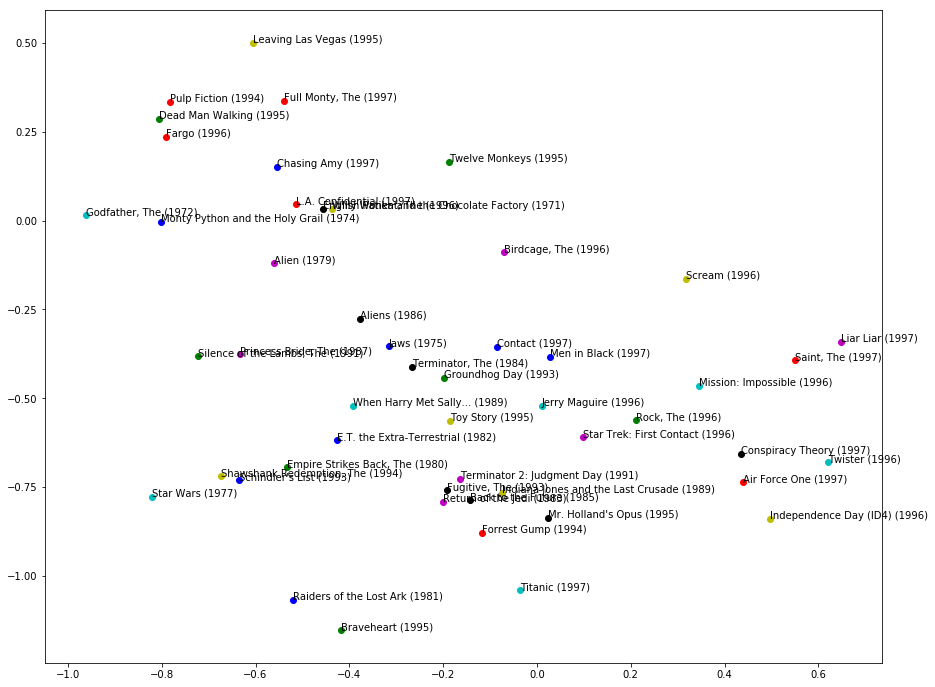

In [277]:
from cycler import cycler
fig, ax = plt.subplots()
fig.set_size_inches(15,12)
col_cycler = cycler(color=['b', 'g', 'r', 'c', 'm', 'y', 'k'])
# col_cycler = cycler(color=['red'])
ax.set_prop_cycle(col_cycler)
for e,txt in enumerate(top_rated[idx]):
    ax.scatter(X[e], Y[e])
    ax.annotate(txt, (X[e], Y[e]))
plt.show()